# Titanic Survivel Prediction

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv("ttrain.csv")

In [3]:
df2=pd.read_csv("ttest.csv")

In [4]:
import warnings
warnings.filterwarnings("ignore")

# EDA

In [5]:
df1.shape

(891, 12)

In [6]:
df2.shape

(418, 11)

In [7]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C


In [8]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
277,1169,2,"Faunthorpe, Mr. Harry",male,40.0,1,0,2926,26.0,NaN,S


In [9]:
df=df1.append(df2) #iki dosyayı birleştirdik. Aynı işi iki kez yapmamak için. Eksik verileri tamamladık.

In [10]:
df.shape

(1309, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
1014/1309
#%20 den fazlası boş ise o sütunu silebilirsiniz.

0.774637127578304

#Boş Veriyi Doldurma Yintemleri
1-Mean - Ortalama
2-Median - Orta değer
3-En yakın komşu KNN - En yakın veri
4-Regression
5-Fforward
6-bbackword
7-En uygun veri ile dolduruyor.

In [14]:
df["Fare"].mean(), df["Fare"].max(), df["Fare"].min(), df["Fare"].std(), df["Fare"].median()

(33.2954792813456, 512.3292, 0.0, 51.75866823917414, 14.4542)

In [15]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean()) #fillna: boşlukları doldurur.

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

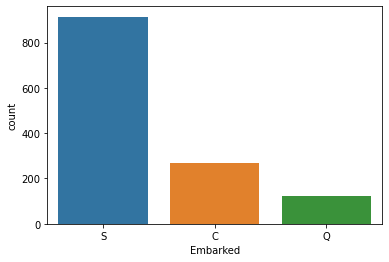

In [17]:
sns.countplot(x=df["Embarked"])

In [18]:
df["Embarked"].mode() #en çok tekrar eden değer

0    S
Name: Embarked, dtype: object

In [19]:
df["Embarked"].value_counts(normalize=True) #en çok binilen yerlerin yüzdesi

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [20]:
#df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode)
df["Embarked"]=df["Embarked"].fillna("S") #boşlukları doldurduk.

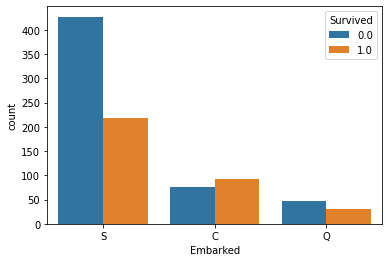

In [21]:
sns.countplot(x="Embarked",hue="Survived",data=df); #hayatta kalanların limanlara göre oranları

In [22]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [23]:
del df["Cabin"]
#df.drop("Cabin",axis=1,inplace=True)
#Birden fazla sütun silmek istenirse ["Cabin","....","....."] şelinde yapılabilir.

In [24]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
322,1214,NaN,2,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,S
276,1168,NaN,2,"Parker, Mr. Clifford Richard",male,28.0,0,0,SC 14888,10.5000,S
382,383,0.0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,S
235,236,0.0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,S
30,31,0.0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C
134,135,0.0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,S
348,1240,NaN,2,"Giles, Mr. Ralph",male,24.0,0,0,248726,13.5000,S
130,131,0.0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,C
613,614,0.0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,Q
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,S


In [27]:
#Feature Engineering #başta olmayıp sonradan sütun eklenmesine denir

In [28]:
df["Title"]=df["Name"].str.extract('([A-Za-z]+)\.',expand=False)
# ismi yazıp ünvandan sonra noktaya kadar olan kısım - extract:çıkar demek

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [30]:
del df["Name"]

In [31]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [32]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

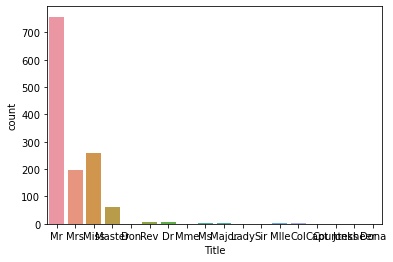

In [33]:
sns.countplot(x=df["Title"]);

In [34]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [35]:
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")
#replace:değiştirmek demek

In [36]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [37]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [38]:
df.groupby('Sex')["Age"].mean()
#groupby:gruplara göre toplama yapar

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [39]:
df[df["Age"]<18]["Age"].mean()

9.101753246753248

In [40]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [41]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [42]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [44]:
df.drop(["PassengerId","Ticket"],axis=1, inplace=True)

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [46]:
data=pd.get_dummies(df,drop_first=True)

In [47]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [48]:
train=data[:891]
test=data[891:]

In [49]:
y=train["Survived"]

In [50]:
x=train.drop("Survived",axis=1)

In [51]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import BernoulliNB
#g=GaussianNB()
#b=BernoulliNB()

In [52]:
#g.fit(x,y)
#b.fit(x,y)

#titanicprediction

In [53]:
#from sklearn.neighbors import KNeighborsClassifier
#k=KNeighborsClassifier()

In [54]:
#k.fit(x,y)

#titanicprediction2

In [55]:
#from sklearn.linear_model import LogisticRegression
#l=LogisticRegression()

In [56]:
#l.fit(x,y)

#titanicprediction3

In [57]:
#from sklearn.tree import DecisionTreeClassifier
#d=DecisionTreeClassifier()

In [58]:
#d.fit(x,y)

#titanicprediction4

In [59]:
#from sklearn.ensemble import RandomForestClassifier
#r=RandomForestClassifier()

In [60]:
#r.fit(x,y)

#titanicprediction5

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [62]:
gb.fit(x,y)

GradientBoostingClassifier()

In [63]:
del test["Survived"]

In [64]:
tahmin1=gb.predict(test)

In [65]:
sonuc=df2[["PassengerId"]]

In [66]:
sonuc["Survived"]=tahmin1

In [67]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

In [68]:
sonuc.to_csv("titanicprediction6.csv",index=False)

# Not: En yüksek değeri LogisticRegression verdi 0,78229